In [17]:
import os
import requests
import urllib.parse
from dotenv import load_dotenv

load_dotenv()

SCRAPEOPS_API_KEY = os.getenv("SCRAPEOPS_API_KEY")
print("API Key:", SCRAPEOPS_API_KEY)

API Key: cfed1758c0094b689d777ed4b64c91623a977f543a9


In [18]:
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

In [19]:
from langchain_tavily import TavilySearch

tool = TavilySearch(
    max_results=5,
    topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

In [27]:
tool.invoke({"query": "What happened at the last wimbledon"})

{'query': 'What happened at the last wimbledon',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': "Andy Murray pulls out of the men's singles draw at his last Wimbledon",
   'url': 'https://www.nbcnews.com/news/sports/andy-murray-wimbledon-tennis-singles-draw-rcna159912',
   'content': "[NBC News Logo](https://www.nbcnews.com) - [U.S. News](https://www.nbcnews.com/us-news) - [U.S. News](https://www.nbcnews.com/us-news) - [Weather](https://www.nbcnews.com/news/weather) - [NBC OUT](https://www.nbcnews.com/nbc-out) - [Nightly News](https://www.nbcnews.com/nightly-news) - [NBC News Now](https://www.nbcnews.com/now) - [NBC News Site Map](https://www.nbcnews.com/archive) - [Facebook](https://www.facebook.com/sharer/sharer.php?u=https://www.nbcnews.com/news/sports/andy-murray-wimbledon-tennis-singles-draw-rcna159912&cid=article_share_facebook) - [Twitter](https://x.com/intent/post?text=Andy%20Murray%20pulls%20out%20of%20the%20men's%20singles%20draw%20at%20h

In [21]:
query = "Machine Learning"
target_url = urllib.parse.quote(f"https://www.google.com/search?q={query}")
url = f"http://api.scrape.do/?token={SCRAPEOPS_API_KEY}&url={target_url}"

In [22]:
response = requests.request("GET", url)
html = response.text

In [23]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Machine Learning - Google Search</title><script nonce="Q98omeuGt0ZL_Miwb8hvng">window._hst=Date.now();</script><script nonce="Q98omeuGt0ZL_Miwb8hvng">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'nx0jaISvFNLp7_UPkZH70Ak',kEXPI:'31',kBL:'a6M3',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en';})();(function(){
var g=this||self;function k(){return window.google&&window.google.kOPI||null};var l,m=[];function n(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||l}function p(a){for(va
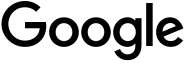

In [24]:
print(soup)

In [25]:
!pip install beautifulsoup4
